<a href="https://colab.research.google.com/github/ayanajade/ayanajade/blob/main/mobilenetv2_Mushroom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="7yuvRBeGWAgrcLpalf0M")
project = rf.workspace("mushroom-01i2l").project("my-first-project-pzzig")
version = project.version(1)
dataset = version.download("folder")

!pip install roboflow tensorflow


loading Roboflow workspace...
loading Roboflow project...


In [3]:
!pip install roboflow tensorflow

In [8]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
DATASET_PATH = "My-First-Project-1"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    f"{DATASET_PATH}/train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    f"{DATASET_PATH}/valid",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

class_names = train_ds.class_names
print("Classes:", class_names)


Found 629 files belonging to 2 classes.
Found 60 files belonging to 2 classes.
Classes: ['Pleurotus Ostreatus', 'Pleurotus Pulmonarius']


In [9]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(train_ds, validation_data=val_ds, epochs=10)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.5774 - loss: 0.6928 - val_accuracy: 0.6333 - val_loss: 0.6292
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.7272 - loss: 0.5520 - val_accuracy: 0.6833 - val_loss: 0.5857
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.7725 - loss: 0.5088 - val_accuracy: 0.7000 - val_loss: 0.5701
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8276 - loss: 0.4363 - val_accuracy: 0.6833 - val_loss: 0.5617
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8391 - loss: 0.3946 - val_accuracy: 0.7000 - val_loss: 0.5578
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8670 - loss: 0.3866 - val_accuracy: 0.6833 - val_loss: 0.5521
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8721 - loss: 0.3467 - val_accuracy: 0.6833 - val_loss: 0.5516
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8669 - loss: 0.3395 - val_accuracy: 0.6833 - val_loss:

In [13]:
model.evaluate(val_ds)
model.save("mobilenetv2_mushroom_classifier.h5")


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.7069 - loss: 0.5995


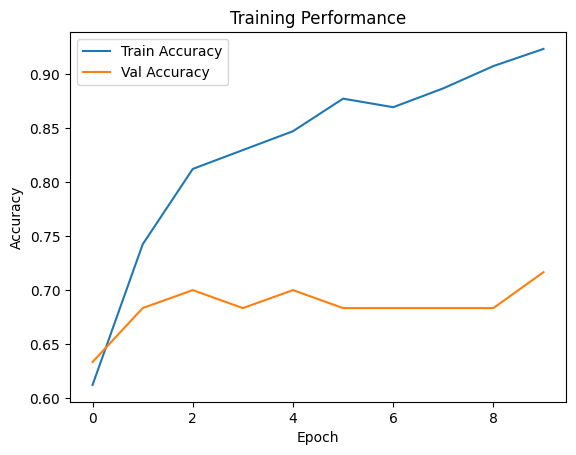

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Performance')
plt.show()
